In [4]:
# STEP 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

First 5 rows of dataset:
   Unnamed: 0       player_name team_abbreviation  age  player_height  \
0           0  Randy Livingston               HOU   22         193.04   
1           1  Gaylon Nickerson               WAS   28         190.50   
2           2      George Lynch               VAN   26         203.20   
3           3    George McCloud               LAL   30         203.20   
4           4      George Zidek               DEN   23         213.36   

   player_weight                college country draft_year draft_round  ...  \
0      94.800728        Louisiana State     USA       1996           2  ...   
1      86.182480  Northwestern Oklahoma     USA       1994           2  ...   
2     103.418976         North Carolina     USA       1993           1  ...   
3     102.058200          Florida State     USA       1989           1  ...   
4     119.748288                   UCLA     USA       1995           1  ...   

    pts  reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  t

<Figure size 1500x500 with 0 Axes>

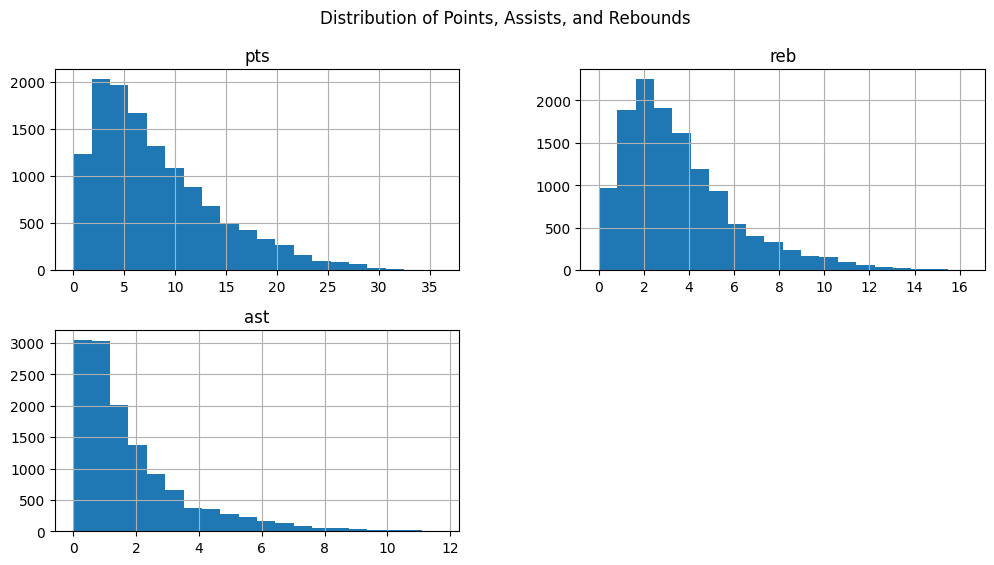

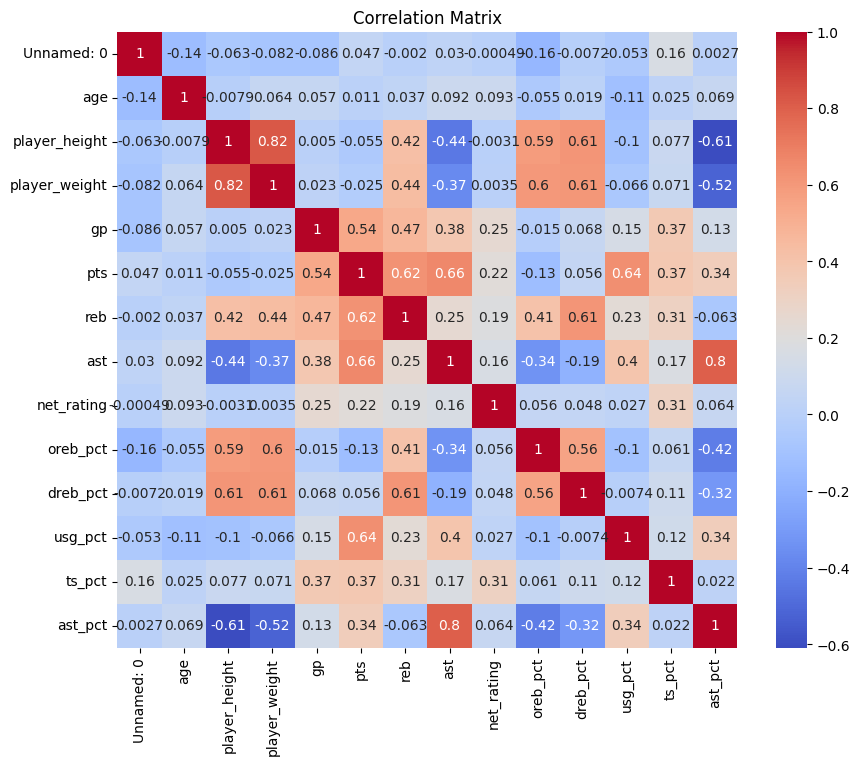

In [7]:
# STEP 2: Load Dataset
nba_df = pd.read_csv("all_seasons.csv")  # Replace with actual file path if needed
print("First 5 rows of dataset:")
print(nba_df.head())

# STEP 3: Exploratory Data Analysis (EDA)
print("\nSummary Statistics:")
print(nba_df.describe())

# Visualizing distributions of key stats
plt.figure(figsize=(15,5))
nba_df[['pts','reb','ast']].hist(bins=20, figsize=(12,6))
plt.suptitle("Distribution of Points, Assists, and Rebounds")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))

# Filter only numeric columns for correlation calculation
numeric_df = nba_df.select_dtypes(include='number')

# Plot heatmap of correlation matrix
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [9]:
# STEP 4: Feature Engineering
# Example: Creating a performance index (custom metric)
nba_df['Performance_Index'] = nba_df['pts'] + nba_df['reb'] + nba_df['ast']

In [10]:
# STEP 5: Handling Missing Values (if any)
print("\nMissing values:")
print(nba_df.isnull().sum())
nba_df.dropna(inplace=True)  # Drop rows with missing values (if any)


Missing values:
Unnamed: 0              0
player_name             0
team_abbreviation       0
age                     0
player_height           0
player_weight           0
college              1854
country                 0
draft_year              0
draft_round             0
draft_number            0
gp                      0
pts                     0
reb                     0
ast                     0
net_rating              0
oreb_pct                0
dreb_pct                0
usg_pct                 0
ts_pct                  0
ast_pct                 0
season                  0
Performance_Index       0
dtype: int64


In [12]:
# STEP 6: Feature Scaling
# Selecting numerical columns (excluding target)
features = ['pts', 'ast', 'reb', 'stl', 'blk', 'tov', 'fg%', 'ft%', '3p%']
features = [f for f in features if f in nba_df.columns]  # Keep only available columns

X = nba_df[features]
Y = nba_df['Performance_Index']  # Target variable

# Standardize the features
from sklearn.preprocessing import StandardScaler

# Ensure 'Performance_Index' exists, or replace it with an actual target column
if 'Performance_Index' not in nba_df.columns:
    # Example: create a dummy performance metric (you can replace this with your logic)
    nba_df['Performance_Index'] = nba_df['pts'] + nba_df['ast'] + nba_df['reb']

# Define target and features
Y = nba_df['Performance_Index']
X = nba_df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)


In [16]:
from sklearn.linear_model import LinearRegression, Ridge

# STEP 8: Model Training

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)


In [18]:
from sklearn.metrics import r2_score, mean_absolute_error

# STEP 9: Model Evaluation
print("\n--- Linear Regression ---")
print("R2 Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))

print("\n--- Ridge Regression ---")
print("R2 Score:", r2_score(y_test, y_pred_ridge))
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))



--- Linear Regression ---
R2 Score: 1.0
MAE: 8.589075260345075e-15

--- Ridge Regression ---
R2 Score: 0.9999999911575774
MAE: 0.0006292409833605839



Feature Importance (Linear Regression):
  Feature  Coefficient
0     pts     5.933003
2     reb     2.392364
1     ast     1.808281


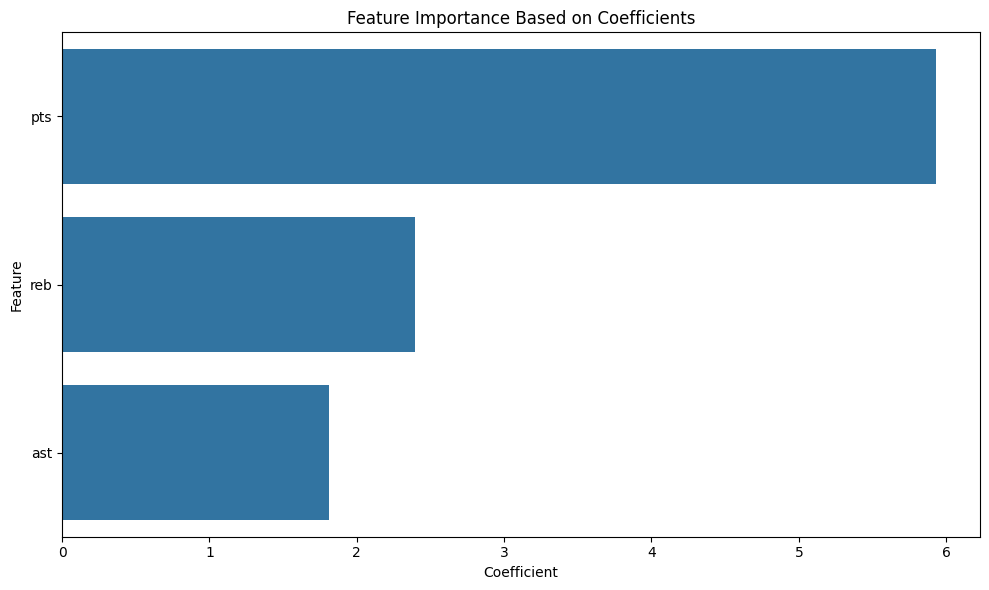

In [19]:
# STEP 10: Feature Importance Analysis
# Linear regression coefficients
importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nFeature Importance (Linear Regression):")
print(importance_df)

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=importance_df)
plt.title("Feature Importance Based on Coefficients")
plt.tight_layout()
plt.show()